In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pickle
import numpy
from glob import glob
from tqdm import tqdm

In [25]:
    with open('/home/server/other_projects/breast_cancer/DATA_PATH/Data/SFUniversity/Annotations.pickle', 'rb') as handle:
        res = pickle.load(handle)

In [26]:
    plt_count = (2,2)
    plt.figure(figsize=(30,30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

1) on image B_3189_1.RIGHT_MLO.png
2) on image B_3189_1.RIGHT_CC.png
3) on image B_3189_1.LEFT_CC.png
4) on image B_3189_1.LEFT_MLO.png


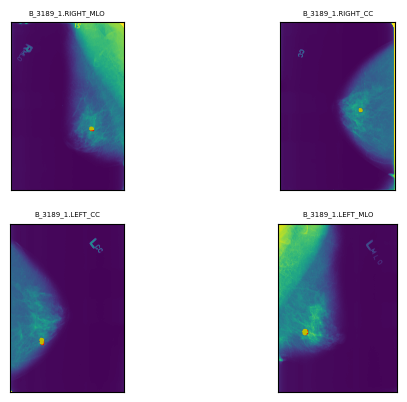

In [27]:
img_ind =0
for i in range(plt_count[0]):
    for j in range(plt_count[1]):            
        key = list(res.keys())[img_ind] 

        while (not os.path.exists(res[key]["image_path"])):
            img_ind+=1
            key = list(res.keys())[img_ind]       

        img = plt.imread(res[key]["image_path"])             
        ax = plt.subplot2grid(plt_count, (i,j))
        ax.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)   
        ax.set_title(key, fontsize=5)            
        ax.imshow(img)

        if "ABNORMALITIES" in res[key].keys():
            for abn in res[key]["ABNORMALITIES"]:
                bbox = res[key]["ABNORMALITIES"][abn]["masks"][0]["bbox"]                
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2]-bbox[0],bbox[3]-bbox[1],
                                        linewidth=1, edgecolor='r', facecolor='none')
                #add patches
                ax.add_patch(rect)
                mask = (res[key]["ABNORMALITIES"][abn]["masks"][0]["mask_x"],res[key]["ABNORMALITIES"][abn]["masks"][0]["mask_y"])
                ax.plot(mask[0],mask[1],color="y")
        print(f"{img_ind+1}) on image {key}.png")
        img_ind+=1


plt.show()
